In [3]:
# pip install mysql.connector

In [43]:
# استيراد المكتبات اللازمة للعمل مع البيانات وتحليلها

import pandas as pd  # مكتبة لتحليل البيانات ومعالجتها بسهولة
import matplotlib.pyplot as plt  # مكتبة لرسم المخططات البيانية
import mysql.connector  # مكتبة للتعامل مع قواعد بيانات MySQL

In [14]:
# تعريف دالة لإنشاء اتصال بقاعدة البيانات
def make_connection_with_db():
    # إنشاء اتصال بقاعدة البيانات باستخدام mysql.connector
    connection_mydb = mysql.connector.connect(
        host='localhost',    # اسم المضيف (السيرفر) حيث توجد قاعدة البيانات
        user='root',         # اسم المستخدم لقاعدة البيانات
        password='',         # كلمة المرور (في هذه الحالة، لا توجد كلمة مرور)
        database='wp-ecommerce'  # اسم قاعدة البيانات التي سيتم الاتصال بها
    )
    
    # إنشاء كائن المؤشر لتنفيذ الاستعلامات على قاعدة البيانات
    # تم تعيين dictionary=True ليكون الإخراج على شكل قاموس بدلاً من قائمة
    cursor = connection_mydb.cursor(dictionary=True)
    
    # إرجاع كلاً من الاتصال وكائن المؤشر
    return connection_mydb, cursor

In [23]:
def get_customers_by_country():
    # إنشاء اتصال بقاعدة البيانات واسترجاع الكيرسور (المؤشر)
    _, cursor = make_connection_with_db()
    
    # تعريف استعلام SQL لجلب عدد العملاء في كل دولة
    sql = '''SELECT country, count(customer_id) as count_by_country 
             FROM wp_wc_customer_lookup 
             GROUP BY country'''
    
    # تنفيذ الاستعلام
    cursor.execute(sql)
    
    # جلب جميع النتائج من قاعدة البيانات
    customers_results = cursor.fetchall()
    
    # إنشاء DataFrame فارغ لإدخال البيانات المسترجعة فيه
    df = pd.DataFrame(columns=['country', 'count_by_country'])
    
    # تمرير نتائج الاستعلام وإضافتها إلى DataFrame
    for customer in customers_results:
        obj = {
            "country": [customer['country']],  # اسم الدولة
            "count_by_country": [customer['count_by_country']]  # عدد العملاء في تلك الدولة
        }
        df_obj = pd.DataFrame(obj)  # تحويل القيم إلى DataFrame مؤقت
        df = pd.concat([df, df_obj], ignore_index=True)  # دمج البيانات مع DataFrame الرئيسي
    
    return df  # إرجاع DataFrame النهائي الذي يحتوي على عدد العملاء لكل دولة

In [25]:
df_customers_countries = get_customers_by_country()

df_customers_countries  # show Data frame

,country,count_by_country
0,KW,188
1,JO,187
2,AE,209
3,SA,179
4,BH,218


In [33]:
def show_customers_by_country_bar():
    # استيراد مكتبة NumPy لاستخدام الألوان العشوائية
    import numpy as np
    
    # جلب بيانات عدد العملاء في كل دولة
    df_customers_countries = get_customers_by_country()

    # استخراج أسماء الدول وعدد العملاء لكل دولة
    x = df_customers_countries['country']
    y = df_customers_countries['count_by_country']

    # تحديد عنوان المخطط
    plt.title('Customers per Country')

    # تسمية المحاور
    plt.xlabel("Country")
    plt.ylabel("Count")

    # إنشاء قائمة للألوان العشوائية لكل عمود في المخطط
    colors = []
    for i in range(len(x)):
        colors.append([np.random.rand(), np.random.rand(), np.random.rand()])
        
        # إضافة النصوص فوق كل عمود لعرض عدد العملاء
        plt.text(x=i, y=y[i], s=y[i])

    # رسم المخطط باستخدام الألوان العشوائية
    plt.bar(x, y, color=colors)
    
    # عرض المخطط النهائي
    plt.show()

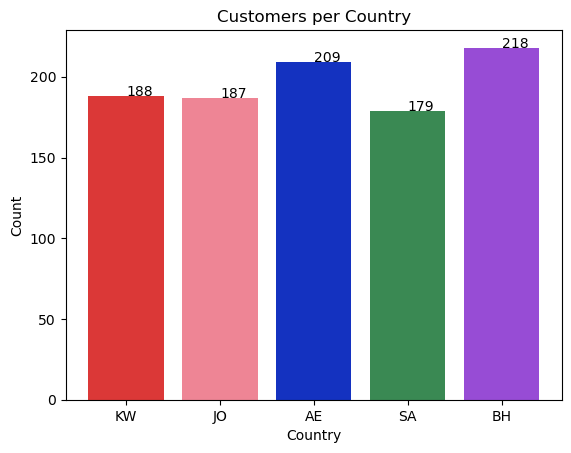

In [34]:
show_customers_by_country_bar() # show bar

In [41]:
def show_customers_by_country_pie():
    # جلب بيانات عدد العملاء في كل دولة
    df_customers_countries = get_customers_by_country()
    
    # إنشاء مخطط دائري يمثل نسبة العملاء لكل دولة
    plt.pie(df_customers_countries['count_by_country'], 
            labels=df_customers_countries['country'],  # تسمية كل قطعة باسم الدولة
            autopct='%1.1f%%')  # إظهار النسبة المئوية لكل دولة

    # إضافة عنوان للمخطط
    plt.title("Customers per Country")

    # عرض المخطط
    plt.show()

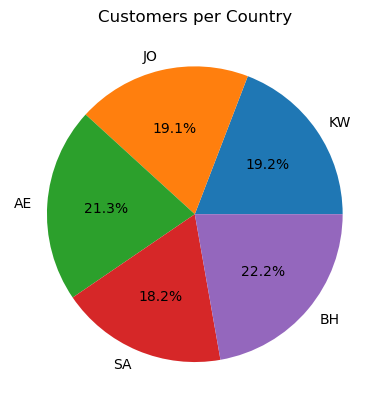

In [42]:
show_customers_by_country_pie() # show pie